# Unsupervised Learning
- Unsupervised Learning의 개념
- Unsupervised Learning의 알고리즘
- Unsupervised Learning의 평가 방법

1. 비지도 학습
2. Clustering
3. k-Means Clustering
4. Hierarchical Clustering
5. 비지도 학습의 평가

데이터의 패턴만 보고 군집을 분류하는 것이 비지도 학습이다.<br/>
학습하지 않고 데이터의 패턴이나 모양을 보고 구분한다.

# 1. 비지도 학습 (자율학습, Unsupervised Learning)
- 기계학습의 일종으로 데이터가 어떻게 구성되었는 지 알아내는 문제의 범주
- 이 방법은 지도학습(Supervised Learning) 혹은 강화학습 (Reinforcement Learning)과는 달리 입력값에 대한 목표치(정답)가 주어지지 않음.
- 비지도 학습은 통계의 밀도추정 (Density Estimation)과 깊은 연관이 있음, 이러한 비지도 학습은 데이터의 주요 특징을 요약하고 설명할 수 있음.
- 비지도 학습의 예 : 클러스터링 (Clustering), 독립 성분 분석 (ICA, Independent Component Analysis)

# 2. Clustering (군집)
- 알고리즘으로 뭉쳐진 데이터 집합을 뽑아낸다. 사전에 학습된 데이터가 아니라 데이터들의 거리를 보고 판단한다.
- 계층적 군집(Hierarchical clustering)과 Point assignment clustering 두가지 방법으로 나눌 수 있다.
- 계층적 군집<br/>
큰 하나의 클러스터로부터 시작해서 모든 클러스터가 정확히 하나의 원소를 가질 때 까지 쪼개는 방법 (top-down) <br/>
각각의 점을 원소로 가지는 클러스터들로부터 전체를 포함하는 클러스터 하나를 만들때까지 반복적으로 두 개의 가까운 클러스터를 합치면서 진행하는<br/>
Agglomerative(bottom-up) 방법으로 나뉜다.

# 3. k-Means Clustering
- 대표적인 클러스터링 알고리즘
- 각 클러스터에 할당된 데이터 포인트의 평균 좌표를 이용해 중심점을 반복적으로 업데이트하면 클러스터를 형성해가는 알고리즘
- k-Means 클러스터링 진행 단계<br/>1. 각 데이터 포인트에서 가장 가까운 중심점을 찾아 그 중심점에 해당되는 클러스터 할당<br/>2. 할당된 클러스터를 기반으로 새로운 중심점 계산, 이 때 중심점은 클러스터 내부 점들의 좌표의 산술 평균<br/>3. 각 클러스터의 할당이 바뀌지 않을 때까지 반복<br/>
- 가장 큰 장점이자 단점 : 학습을 하지 않고 데이터만 넣어주면 쪼갠다. 그러다보니 엉뚱한 결과가 나올 수도 있다.

## K-Means Clustering 점과 점 사이 거리 측정
1. Manhattan Distance - 각 축에 대해 수평과 수직으로만 이동하는 방식<br/>
<img src="./images/0411_4.png" style="float:left" width=600px>

2. Euclidean Distance - 점과 점 사이의 가장 짧은 거리를 계산하는 거리 측정방식<br/>
<img src="./images/0411_5.png" style="float:left" width=600px><br/><br/>

from sklearn.cluster import KMeans<br/>
kmeans - KMeans(n_clusters=3)<br/><br/>
kmeans.fit(data)<br/><br/>
cluster = kmeans.predict(data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
print(wine.DESCR) # scikit-learn의 모든 데이터에 DESCR로 설명을 볼 수 있다.

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
data = wine.data
label = wine.target
column = wine.feature_names

In [5]:
data = pd.DataFrame(data, columns = column)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
data.shape # 와인데이터의 모양

(178, 13)

각 열의 숫자 편차가 크기 때문에 MinMaxScaling을 먼저 해준다.

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [8]:
data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

숫자의 크기에 대한 편차를 맞춰줬기 때문에 데이터를 오용할 염려가 사라짐. <br/>
PCA 알고리즘을 사용해서 2차원으로 차원을 낮춰줌.

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2차원으로 축소
data = pca.fit_transform(data)

In [10]:
data.shape

(178, 2)

데이터 확인 후 MinMaxScaler로 크기 맞춰주고, 차원을 낮춘 상황.
n_clus

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) #군집의 갯수까지는 몰라서 군집의 갯수를 넣으면 최대한 맞춰 준다.
kmeans.fit(data) # PCA로 차원축소한 데이터를 fit 해본다.

KMeans(n_clusters=3)

In [12]:
cluster = kmeans.predict(data)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

데이터를 주고 예측한 결과가 cluster에 저장된다.

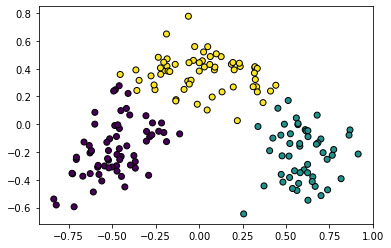

In [14]:
plt.scatter(data[:, 0], data[:,1], c=cluster, linewidth=1, edgecolors="k")
# 군집이 형성된 것을 확인할 수 있다.

# Hierarchical Clustering
- 좀 더 시각적, 거리와 유사도를 기반으로 클러스터를 형성하는 알고리즘<br/>
- 클러스터 진행 단계<br/>1. 각 데이터 포인터를 클러스터로 할당 (n개의 클러스터)<br/>2. 가까운 클러스터끼리 병합<br/>3. 1개의 클러스터가 될 때까지 반복

가까이에 있는 데이터끼리 뭉치다보면 자연스럽게 클러스터가 생성된다.<br/>
위에서 계층적으로 내려갈 수 있다.

- 어떻게 가장 가까운 클러스터를 찾을 수 있을까?<br/>1. Single Linkage - 두 클러스터 내의 가장 가까운 점 사이의 거리 <br/>2. Complete Linkage - 두 클러스터 내의 가장 먼 점 사이의 거리<br/>3. Average Linkage - 두 클러스터 내의 모든 점 사이의 평균 거리

from sklearn.cluster import AgglomerativeClustering<br/>
single_clustering = AgglomerativeClustering(linkage='single', n_clusters=3)<br/><br/>
single_clustering.fit(data)<br/><br/>
single_cluster = single_clustering.labels

<img src="./images/0411_6.png" style="float:left" width=600px>